# Project DD1334
Group members
*   Xinyang Li
*   Nathalie Haghshenas
*   Penglong Su
*   Weiqi Xie


# Presentation Video
https://drive.google.com/file/d/1-wWhGb9XcmPTf7yclNjcjIGwC7whRZYF/view?usp=drive_link

# Project Data
https://drive.google.com/drive/folders/1VAbENb8xUBrDWz63CctBcGdl_is6oedD
car_data.csv

# Project Description
In our project, we choose SQLite as our DBMS, and then use pandas, seaborn, numpy libraries etc. to work on data visualization and prediction. After finishing data processing and visualization, we use several data machine learning algorithms like XGBoost, SVR, LightGBM. Among all of the algorithms, LightGBM has the best performance (*the smallest mean sqaure error*). That's why we choose it as the final prediciton model.

# Functions and Structure of a Database Management System (DBMS):

# Functions:
**Data Storage**: We can use SQLite to store our data

**Data Retrieval**: We can retrieve data using SQL in SQLite, making it easy to fetch information from the database.

**Data Security**: SQLite provides basic security features like file permissions.

**Concurrency Control**: SQLite supports transactions and ensures that data integrity is maintained even with multiple users accessing the database simultaneously.
# Structure:

**Database**: In SQLite, a database is a single file containing one or more tables.

**Table**: Tables are used to store data, organized into rows and columns.

**Queries**: We can use SQL queries to interact with SQLite, including SELECT, INSERT, UPDATE, DELETE, and more.

**Indexes**: SQLite supports indexing to improve query performance.

# Advantages and Disadvantages of Different Database Models:

# Advantages:

ACID Compliance: SQLite ensures data integrity with Atomicity, Consistency, Isolation, and Durability.

Easy to Use: It's easy to set up and doesn't require a separate server.

Support for Transactions: SQLite supports transactions for complex operations.
# Disadvantages:

Lack of Network Access: SQLite is a local file-based system and lacks network capabilities.

Limited Scalability: It's not suitable for large-scale, high-traffic applications.
# Modeling and Structuring Data According to Actual Constraints:

One piee of data contains: carid(int), tradetime(YYYY/MM/DD), brand(int), serial(int), model(int), mileage(float)， color(int)， cityId(int), carcode(int),transfercount(int), seatings(int), resiterdate(YYYY/MM/DD), licensedate(YYYY/MM/DD), country(int), maketype(int), modelyear(int), displacement(float), gearbox(int), oiltype(int), newprice(float), price(float)
# For example:
1 2021/6/28 1 1 1 4.01 1 1 1 0 5 2017/12/1 2018/1/26 779413 1 2017 1.5 1 1 6.88 4.24



In [ ]:
import pandas as pd
import missingno as msn
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import datetime
from tqdm import tqdm
tqdm.pandas()

In [ ]:
##pip install missingno

In [ ]:
import csv
import sqlite3
import codecs

from google.colab import files
uploaded = files.upload()

connection = sqlite3.connect('cars.db')
cursor = connection.cursor()

create_table = '''CREATE TABLE IF NOT EXISTS carinfor (
          Carid TEXT NOT NULL, Tradetime TEXT NOT NULL, Brand TEXT NOT NULL, Serial TEXT NOT NULL, Model TEXT NOT NULL,
          Mileage TEXT NOT NULL, Color TEXT NOT NULL, Cityid TEXT NOT NULL, Carcode TEXT NOT NULL, Transfercount TEXT NOT NULL,
          Seatings TEXT NOT NULL, Registerdate TEXT NOT NULL, Licensedate TEXT NOT NULL, Country TEXT NOT NULL, Maketype TEXT NOT NULL,
          Modelyear TEXT NOT NULL, Displacement TEXT NOT NULL, Gearbox TEXT NOT NULL, Oiltype TEXT NOT NULL, Newprice TEXT NOT NULL,
          Price TEXT NOT NULL);
                '''
cursor.execute(create_table)

file = codecs.open('car_data.csv', 'r', encoding='utf-8-sig')

contents = csv.reader(file)
insert_records = '''INSERT INTO carinfor
(Carid, Tradetime, Brand, Serial, Model, Mileage, Color, Cityid, Carcode, Transfercount, Seatings, Registerdate, Licensedate, Country, Maketype, Modelyear, Displacement, Gearbox, Oiltype, Newprice, Price)
VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)'''

cursor.executemany(insert_records, contents)
select_all = "SELECT * FROM carinfor"
rows = cursor.execute(select_all).fetchall()

for i, row in enumerate(rows):
    print(row)
    if i == 9:
        break

select_count = "SELECT COUNT(*) FROM carinfor"
cursor.execute(select_count)

row_count = cursor.fetchone()[0]
print(f"There are {row_count} rows in the table")
connection.commit()



In [ ]:
delete_records = "DELETE FROM carinfor"
cursor.execute(delete_records)
connection.commit()
try:
        query = "DROP TABLE carinfor";
        cursor.execute(query)
        connection.commit()

except sqlite3.error as e:
        print("ROLLBACK: carinfor table doesn't exist or other error.")
        print("Error message:", e.args[0])
        connection.rollback()
        pass
connection.close()

# Data visualization


In [ ]:
df = pd.read_csv("car_data.csv")

df

,carid,tradeTime,brand,serial,model,mileage,color,cityId,carCode,transferCount,...,registerDate,licenseDate,country,maketype,modelyear,displacement,gearbox,oiltype,newprice,price
0,1,2021-06-28,1,1,1,4.01,1,1,1.0,0,...,2017-12-01,2018-01-26,779413.0,1.0,2017.0,1.5,1.0,1,6.88,4.24
1,2,2021-06-25,2,2,2,8.60,1,2,1.0,0,...,2016-12-01,2017-03-21,779415.0,2.0,2017.0,1.2,2.0,1,11.98,7.38
2,5,2021-06-19,5,5,5,15.56,1,2,3.0,0,...,2008-02-01,2008-02-27,NaN,NaN,2008.0,1.6,4.0,1,12.78,1.00
3,6,2021-06-29,6,6,6,6.04,1,3,1.0,3,...,2016-08-01,2016-09-09,779413.0,1.0,2016.0,1.3,2.0,1,9.49,4.38
4,7,2021-06-30,7,7,7,5.70,4,1,2.0,2,...,2012-08-01,2012-08-28,779415.0,2.0,2012.0,2.0,5.0,1,18.08,5.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,18531,2021-05-26,34,588,4169,10.38,5,35,3.0,0,...,2007-02-01,2007-03-25,779413.0,1.0,2006.0,1.8,6.0,1,11.86,0.88
29996,4294,2020-06-03,12,92,1797,11.69,2,1,2.0,2,...,2012-03-01,2012-05-09,779415.0,2.0,2012.0,2.0,22.0,1,20.28,8.30
29997,20584,2020-09-27,7,113,501,9.87,6,1,2.0,0,...,2011-12-01,2012-02-03,779415.0,2.0,2009.0,1.6,4.0,1,14.58,5.00
29998,11490,2020-11-09,45,131,3024,9.57,1,1,1.0,1,...,2016-04-01,2016-05-17,779415.0,3.0,2015.0,2.5,25.0,2,35.40,28.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carid          30000 non-null  int64  
 1   tradeTime      30000 non-null  object 
 2   brand          30000 non-null  int64  
 3   serial         30000 non-null  int64  
 4   model          30000 non-null  int64  
 5   mileage        30000 non-null  float64
 6   color          30000 non-null  int64  
 7   cityId         30000 non-null  int64  
 8   carCode        29991 non-null  float64
 9   transferCount  30000 non-null  int64  
 10  seatings       30000 non-null  int64  
 11  registerDate   30000 non-null  object 
 12  licenseDate    30000 non-null  object 
 13  country        26243 non-null  float64
 14  maketype       26359 non-null  float64
 15  modelyear      29688 non-null  float64
 16  displacement   30000 non-null  float64
 17  gearbox        29999 non-null  float64
 18  oiltyp

From the information we found that **carCode, country, maketype, modelyear,gearbox** have nan rows

<Axes: >

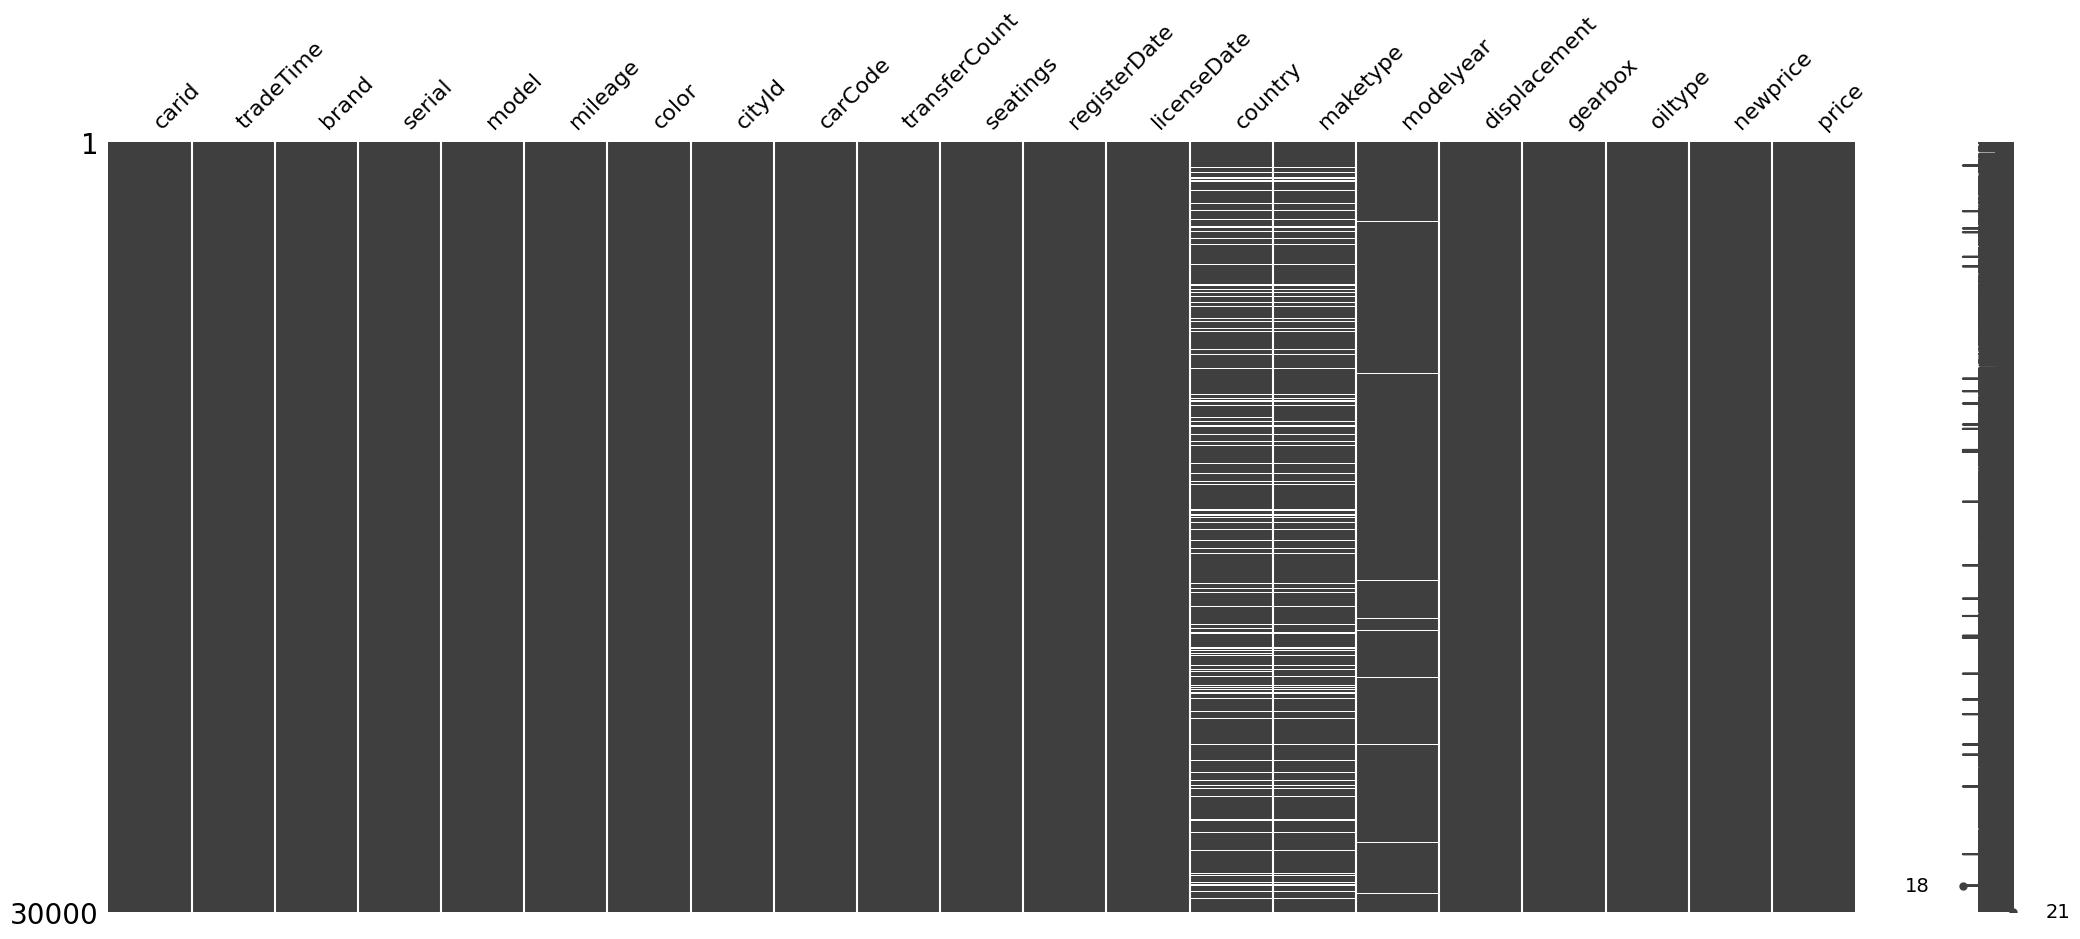

In [ ]:
msn.matrix(df)

From the picture we found that **carCode, country, maketype, modelyear,gearbox** have few NAN rows. We can drop the NAN rows or just fill the average value.

# Outlier visualization

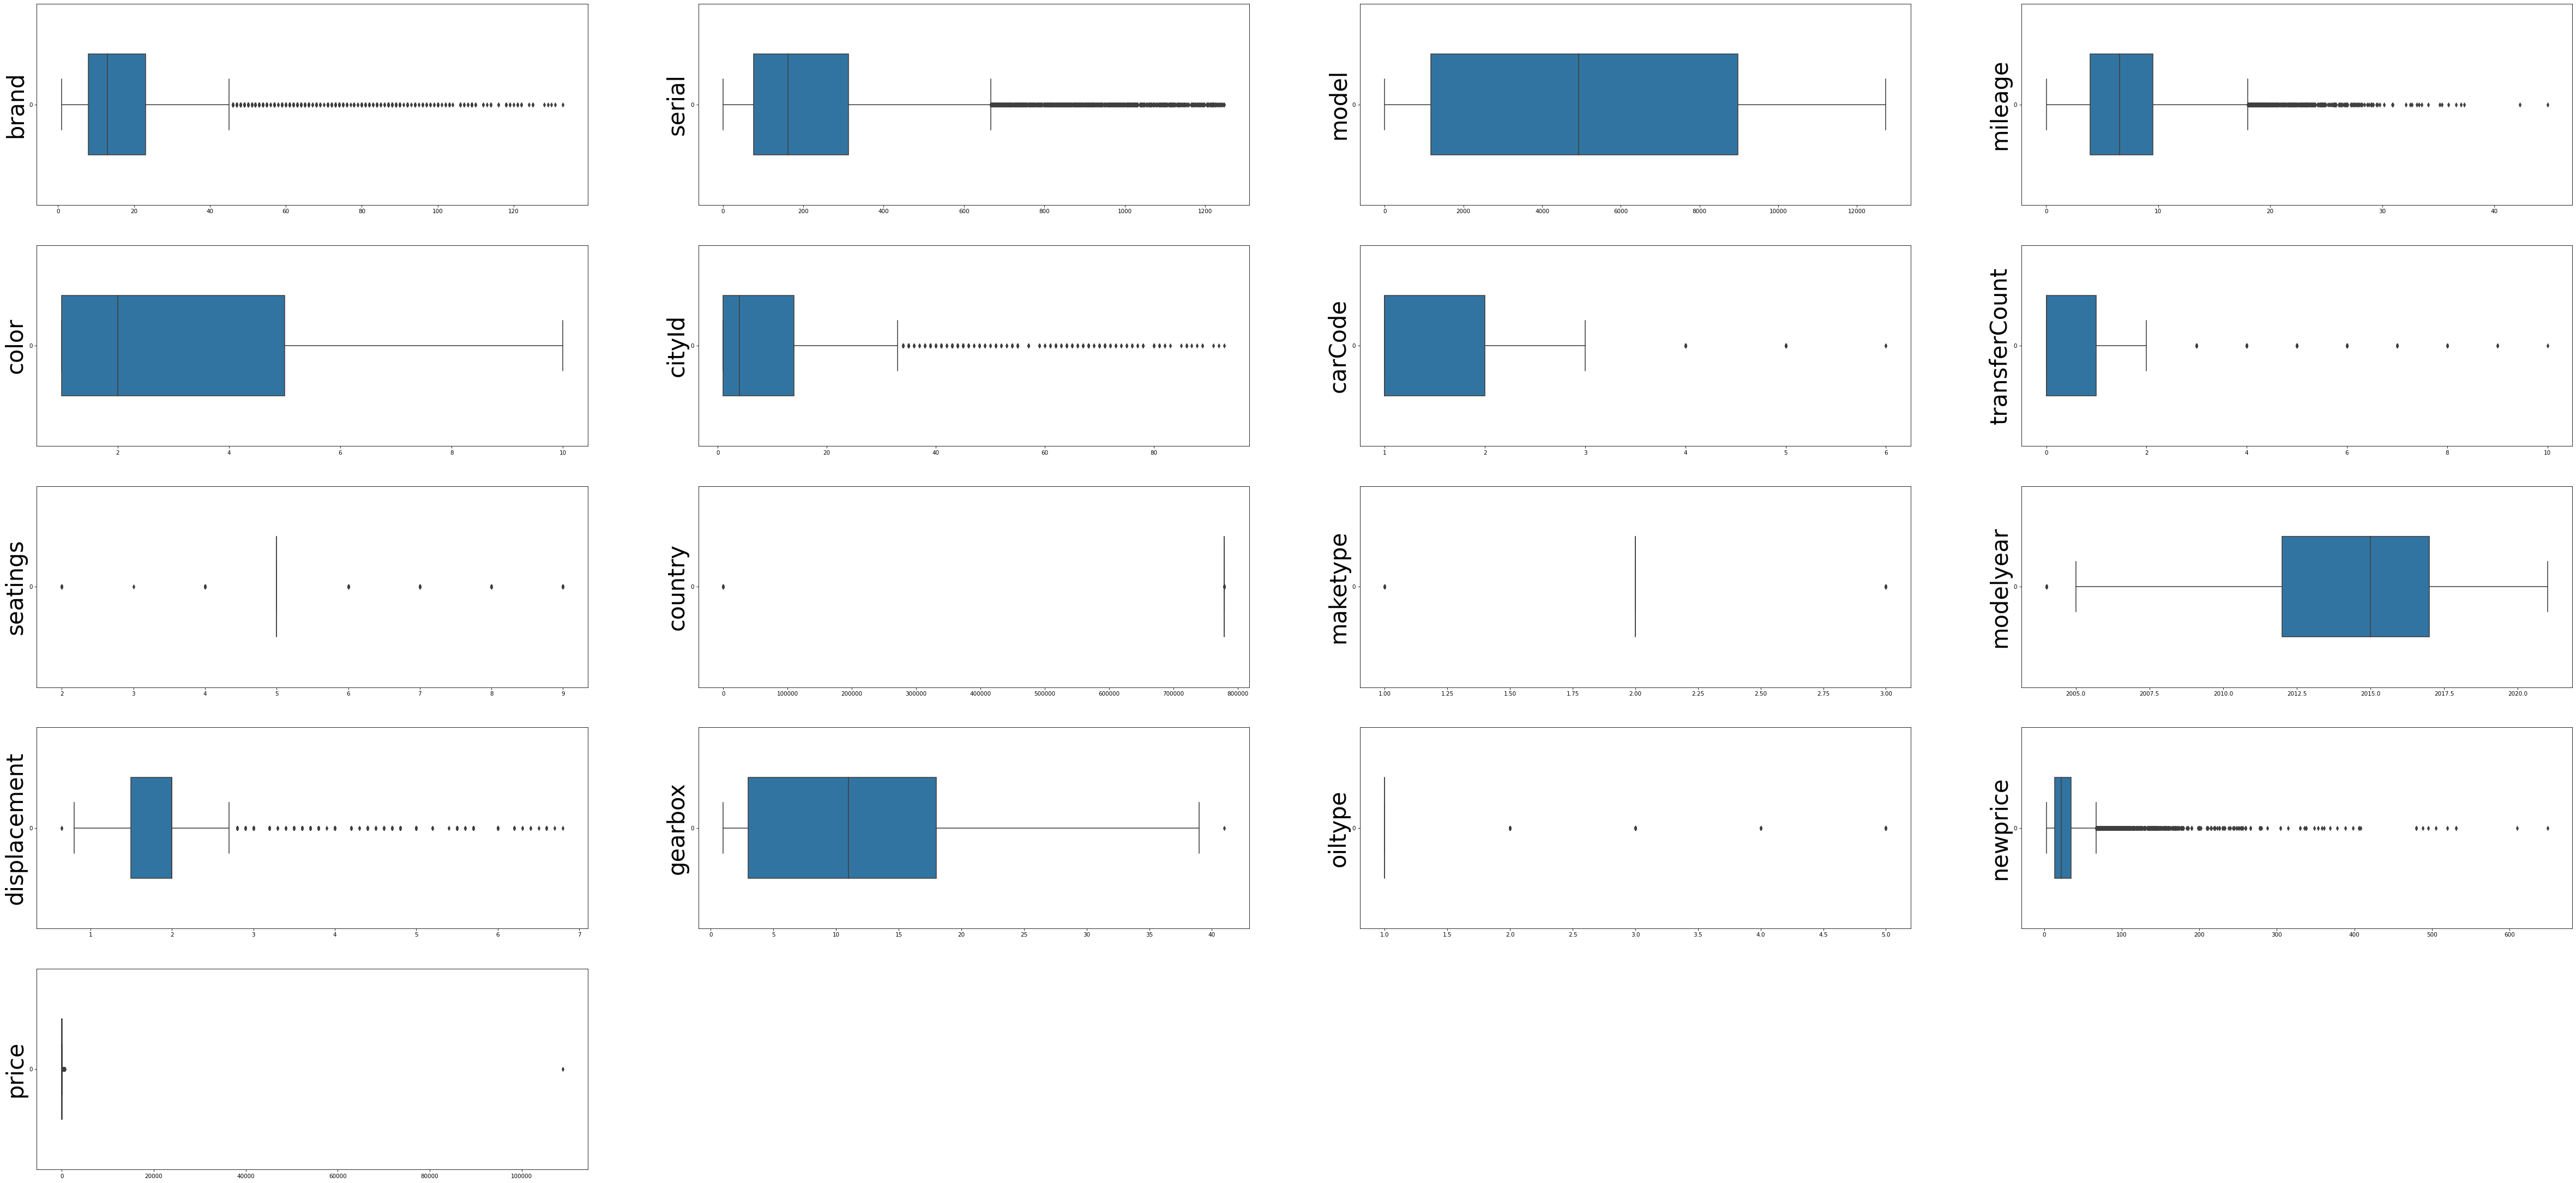

In [ ]:
##exclude some data which related to time(license date, trade time, registerDate, licenseDate)
column = [ "brand", "serial", "model", "mileage", "color", "cityId", "carCode", "transferCount", "seatings",
"country", "maketype", "modelyear", "displacement", "gearbox", "oiltype", "newprice","price"]
fig = plt.figure(figsize=(80,60),dpi=75)
for i in range(len(column)):
    plt.subplot(8,4,i+1)
    sns.boxplot(df[column[i]],orient= 'h',width=0.5)
    plt.ylabel(column[i],fontsize = 40)
plt.show()


The outliers distribution

# The distribution of features

In [ ]:
# Distribution of all fields
dist_cols = 6
dist_rows = len(df.columns)
plt.figure(figsize=(4*dist_cols,4*dist_rows))
i = 1
for col in column:
    if col =='price':
        continue
    ax = plt.subplot(dist_rows,dist_cols,i)
    ax = sns.kdeplot(df[col],color='Red')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax = ax.legend(['dataframe'])
    i+=1
plt.show()


# The distribution of 'price'

In [ ]:
df['price'].describe()

average value: 18.06<p>
It has some outliers.

In [ ]:
y_p = df[df['price'] <= 200]
y_p

There are 20 rows larger than 200, the average value is below 75

In [ ]:
plt.hist(y_p['price'], orientation='vertical',
         histtype='bar', color='red')
plt.show()

In [ ]:
sns.kdeplot(df[df['price'] < 75]['price'], color='Red', shade=True)


It does not follow normal distribution, it's right skewed

In [ ]:
# Use the log function to change it into approximately normal distribution
df = df[df['price']<=75]
df['price'] = np.log1p(df['price'])


In [ ]:
y = df['price']
plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)


# The correlation visualization

In [ ]:
k = len(column)
correlation_matrix = df.corr()
col = correlation_matrix.nlargest(k,'price')['price'].index
cm = np.corrcoef(df[col].values.T)
hm = plt.subplots(figsize = (30,30))
hm = sns.heatmap(df[col].corr(),annot=True,square=True)
plt.show()


**newprice, displacement, maketype, modelyear, gearvox, model, seatings, transfercount, serial, brand, oiltype** are positively related to **price**, and **coutnry, carcode, cityid** are negatively related.

# Data preprocessing

In [ ]:
df = pd.read_csv('car_data.csv')

In [ ]:
##drop nan value
df = df.dropna()

In [ ]:
df

In [ ]:
# # Time processing (extracted day, month and year)
df['tradeTime'] = pd.to_datetime(df['tradeTime'])
df['registerDate'] = pd.to_datetime(df['registerDate'])
df['licenseDate'] = pd.to_datetime(df['licenseDate'])


df['tradeTime_year'] = df['tradeTime'].dt.year
df['tradeTime_month'] = df['tradeTime'].dt.month
df['tradeTime_day'] = df['tradeTime'].dt.day
df['registerDate_year'] = df['registerDate'].dt.year
df['registerDate_month'] = df['registerDate'].dt.month
df['registerDate_day'] = df['registerDate'].dt.day



In [ ]:
df

In [ ]:
df.to_csv('clear_df.csv',index=0,encoding='utf-8')

In [ ]:
clear_df = pd.read_csv('clear_df.csv')

In [ ]:
clear_df

In [ ]:
clear_df.columns

In [ ]:
pip install catboost

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.svm import SVR
import warnings
from sklearn.preprocessing import scale
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import xgboost as xgb
from catboost import CatBoostRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score

In [ ]:
n_price = 75
df_X = clear_df[clear_df['price'] < n_price]
##data normalization
df_X['price'] = np.log1p(df_X['price'])
train_y = df_X['price']
df_X.drop(['tradeTime','registerDate','licenseDate'],axis=1,inplace=True)
del df_X['price']
scaler = StandardScaler()
train_x = scaler.fit_transform(df_X)



# LightGBM

Comparing LightGBM with other two models (SVR,XGBoost), we found that LightGBM has the best performance, since its MSR is the smallest. As a result, we choose LightGBM as our prediciton model.

In [ ]:

params = {'learning_rate': 0.01,
          'boosting_type': 'gbdt',
          'objective': 'regression_l1',
          'metric': 'mae',
          'min_child_samples': 46,
          'min_child_weight': 0.01,
          'feature_fraction': 0.8,
          'bagging_fraction': 0.8,
          'bagging_freq': 2,
          'num_leaves': 32,
          'max_depth': 8,
          'n_jobs': -1,
          'seed': 2019,
          'verbose': -1,
          }




In [ ]:
val_pred = np.zeros(len(train_x))
val_true = np.zeros(len(train_x))

folds = 5
# seeds = [1234]
# for seed in seeds:
kfold = KFold(n_splits=folds, shuffle=True, random_state=4321)
for fold, (trn_idx, val_idx) in enumerate(kfold.split(train_x, train_y)):
    print('fold ', fold + 1)
    x_trn, y_trn, x_val, y_val = train_x[trn_idx], train_y.iloc[trn_idx], train_x[val_idx], train_y.iloc[val_idx]
    train_set = lgb.Dataset(x_trn, y_trn)
    val_set = lgb.Dataset(x_val, y_val)

    model = lgb.train(params, train_set, num_boost_round=5000,
                      valid_sets=(
                          train_set, val_set))
    val_pred[val_idx] += model.predict(x_val, predict_disable_shape_check=True)
    val_true[val_idx] += y_val
#     print(y_val)
mse = mean_squared_error(val_true, val_pred)
print('-'*120)
print('Mean_square_erros is: ', round(mse, 5))
# print('Accuracy is:',model.score(val_true, val_pred))


# Just test visualization using training data

This piece of data has the true second-hand price data, we just use this value as a test for our prediction result.

The final result shows that our model has a good performance, and the perdiction error is very small compared to the true value.

In [ ]:
def input_function():
    input_val = input('Please input the information:').strip().split()
    input_val_tra = []
    print(type(input_val))
    # print
    print(input_val)
    for  i in range(len(input_val)):
        print(input_val[i])
        try:
            input_val_tra.append(float(input_val[i]))
        except:
            input_val_tra.append(input_val[i])
    # print(input_val_tra)
    return input_val_tra

In [ ]:
test_sample = input_function()

1	2021/6/28	1	1	1	4.01	1	1	1	0	5	2017/12/1	2018/1/26	779413	1	2017	1.5	1	1	6.88	4.24

In [ ]:
column_names = ['carid', 'tradeTime', 'brand', 'serial', 'model', 'mileage', 'color',
       'cityId', 'carCode', 'transferCount', 'seatings', 'registerDate',
       'licenseDate', 'country', 'maketype', 'modelyear', 'displacement',
       'gearbox', 'oiltype', 'newprice','price']

# Converting a List to a DataFrame
df_new = pd.DataFrame([test_sample], columns=column_names)

In [ ]:
def time_processing(df_new):
    df_new['tradeTime'] = pd.to_datetime(df_new['tradeTime'])
    df_new['registerDate'] = pd.to_datetime(df_new['registerDate'])
    df_new['licenseDate'] = pd.to_datetime(df_new['licenseDate'])


    df_new['tradeTime_year'] = df_new['tradeTime'].dt.year
    df_new['tradeTime_month'] = df_new['tradeTime'].dt.month
    df_new['tradeTime_day'] = df_new['tradeTime'].dt.day
    df_new['registerDate_year'] = df_new['registerDate'].dt.year
    df_new['registerDate_month'] = df_new['registerDate'].dt.month
    df_new['registerDate_day'] = df_new['registerDate'].dt.day
    return df_new

In [ ]:
df_new = time_processing(df_new)

In [ ]:
df_new

In [ ]:
true_price = df_new['price']

In [ ]:
true_price

In [ ]:
df_new.drop(['tradeTime','registerDate','licenseDate'],axis=1,inplace=True)
del df_new['price']

In [ ]:
def inverse_transfer_y(df_new):
    new_features = scaler.transform(df_new)
    predicted_values = model.predict(new_features)

    # If the y-value needs to be back-converted to the original scale
    # predicted_y = train_y.inverse_transform(predicted_values)  # Assuming scaler_y is a StandardScaler object for the target variable y
    original_data = np.expm1(predicted_values)
    return original_data


In [ ]:
print('the model predicts price as :',inverse_transfer_y(df_new)[0])
print('the true price is',true_price[0])

# Real predict

In this part, we use data without second-hand price to predict.

In [ ]:
predict_sample = input_function()

NameError: ignored

 3	2021/9/26	3	3	3	6.64	2	3	1	0	7	2018/3/1	2018/8/20	779416	2	2018	2	3	1	25.98

In [ ]:
column_names = ['carid', 'tradeTime', 'brand', 'serial', 'model', 'mileage', 'color',
       'cityId', 'carCode', 'transferCount', 'seatings', 'registerDate',
       'licenseDate', 'country', 'maketype', 'modelyear', 'displacement',
       'gearbox', 'oiltype', 'newprice']

# Converting a List to a DataFrame
df_predict = pd.DataFrame([predict_sample], columns=column_names)

In [ ]:
df_predict = time_processing(df_predict)

In [ ]:
df_predict.drop(['tradeTime','registerDate','licenseDate'],axis=1,inplace=True)


In [ ]:
df_predict

In [ ]:
print('the model predicts price as :',inverse_transfer_y(df_predict)[0])

# XGBOOST

In [ ]:
params = {
    'booster': 'gbtree',
    'objective': 'reg:gamma',
    'gamma': 0.1,
    'max_depth': 5,
    'lambda': 3,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'min_child_weight': 3,
#     'silent': 1,
    'eta': 0.1,
    'seed': 1000,
    'nthread': 4,
}



In [ ]:
val_pred = np.zeros(len(train_x))
val_true = np.zeros(len(train_x))

folds = 5
# seeds = [1234]
# for seed in seeds:
kfold = KFold(n_splits=folds, shuffle=True, random_state=4321)
for fold, (trn_idx, val_idx) in enumerate(kfold.split(train_x, train_y)):
    print('fold ', fold + 1)
    x_trn, y_trn, x_val, y_val = train_x[trn_idx], train_y.iloc[trn_idx], train_x[val_idx], train_y.iloc[val_idx]
    dtrain = xgb.DMatrix(x_trn,y_trn)
    dtest = xgb.DMatrix(x_val,y_val)
    num_rounds = 300
    plst = list(params.items())
    model = xgb.train(plst, dtrain, num_rounds)
    val_pred[val_idx] += model.predict(dtest)
    val_true[val_idx] += y_val
#     print(y_val)
mse_1 = mean_squared_error(val_true, val_pred)
print('-'*120)
print('Mean_square_erros is: ', round(mse_1, 5))
# print('Accuracy is:',model.score(val_true, val_pred))

# SVR

In [ ]:
from sklearn.model_selection import KFold
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

val_pred = np.zeros(len(train_x))
val_true = np.zeros(len(train_x))

folds = 5
# seeds = [1234]
# for seed in seeds:
kfold = KFold(n_splits=folds, shuffle=True, random_state=4321)
for fold, (trn_idx, val_idx) in enumerate(kfold.split(train_x, train_y)):
    print('fold ', fold + 1)
    x_trn, y_trn, x_val, y_val = train_x[trn_idx], train_y.iloc[trn_idx], train_x[val_idx], train_y.iloc[val_idx]
    SVR_model = SVR(C=1.0, epsilon=0.2)
    SVR_model.fit(x_trn,y_trn)

    val_pred[val_idx] += SVR_model.predict(x_val)
    val_true[val_idx] += y_val
#     print(y_val)
mse_svr = mean_squared_error(val_true, val_pred)
print('-'*120)
print('Mean_square_error is: ', round(mse_svr, 5))
# print('Accuracy is:',model.score(val_true, val_pred))